In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.io.ascii import read
from astropy import units as u
from matplotlib.ticker import ScalarFormatter

# Colores
colors = ["#440154", "#31688E", "#35B779", "#FDE725", "#3B528B", "#21908C", "#8FD744", "#FDE333"]

In [15]:
# Leer los datos
t5 = read('t5000.dat', data_start = 25, names=['k', 'lgTauR', 'lgTau5', 'Depth', 'T', 'Pe', 'Pg', 'Prad', 'Pturb'])
t8 = read('t8000.dat', data_start = 25, names=['k', 'lgTauR', 'lgTau5', 'Depth', 'T', 'Pe', 'Pg', 'Prad', 'Pturb'])
# Array de datos
data_t5 = {}
data_t8 = {}

for col in t5.colnames:
    data_t5[col] = np.array(t5[col])
    data_t8[col] = np.array(t8[col])

# Gráficos


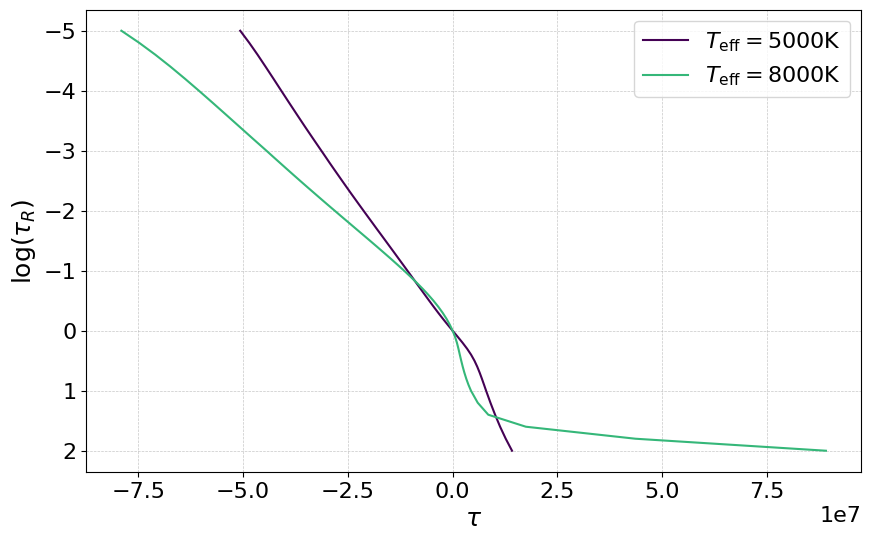

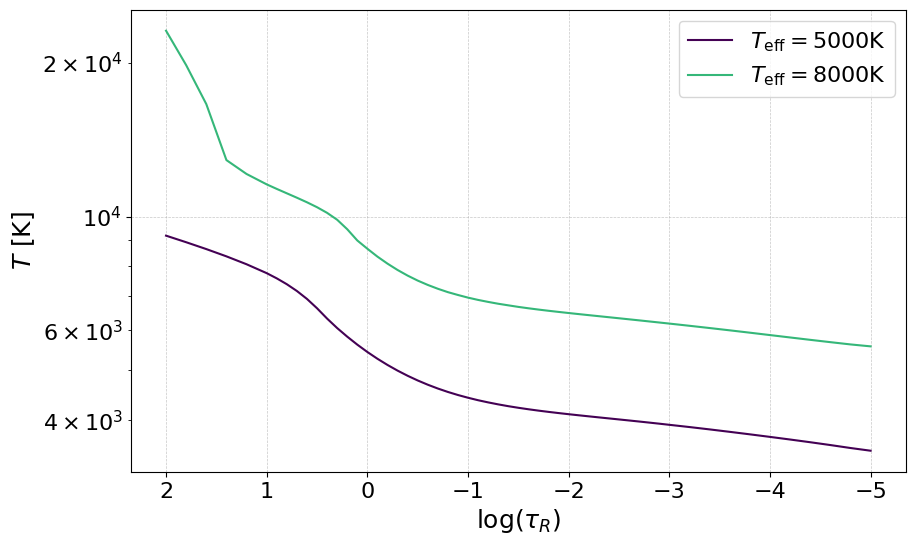

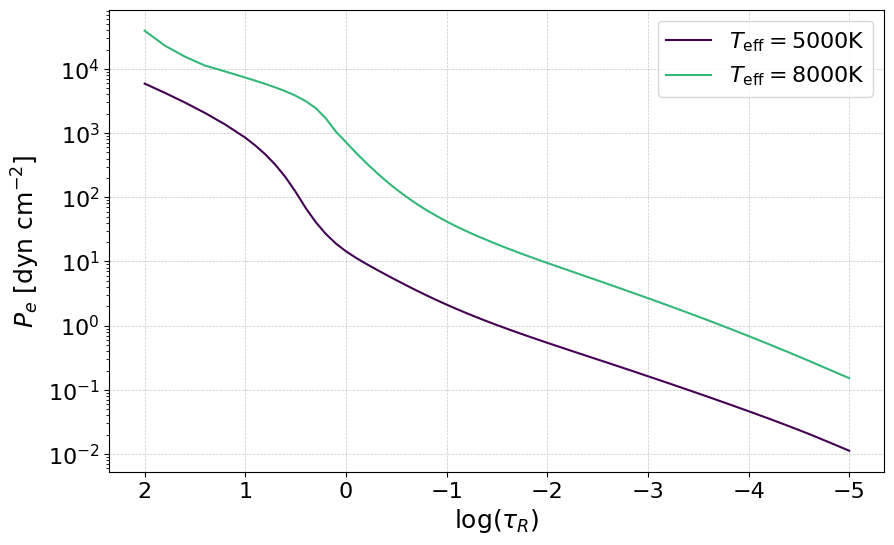

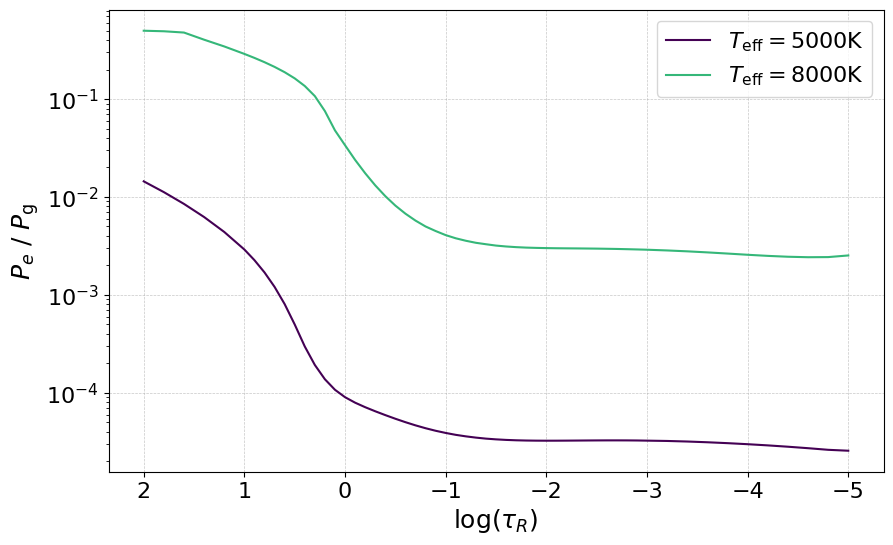

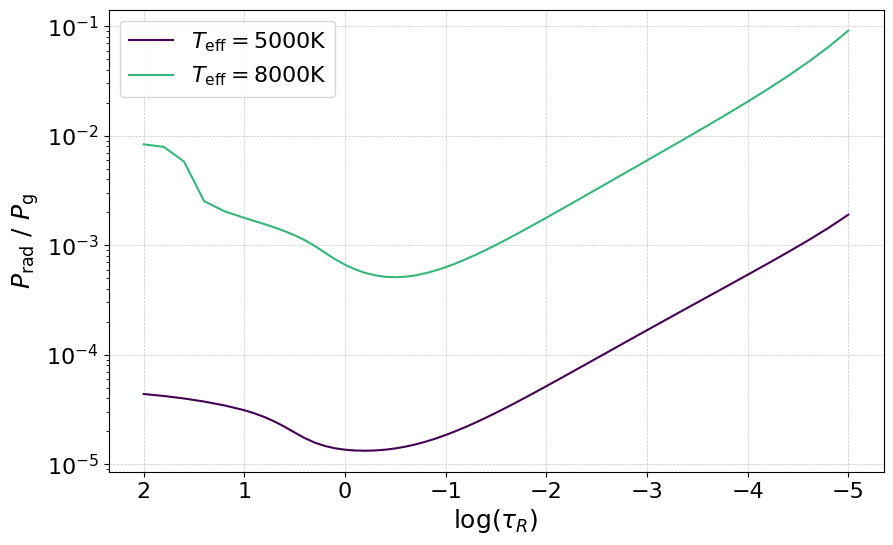

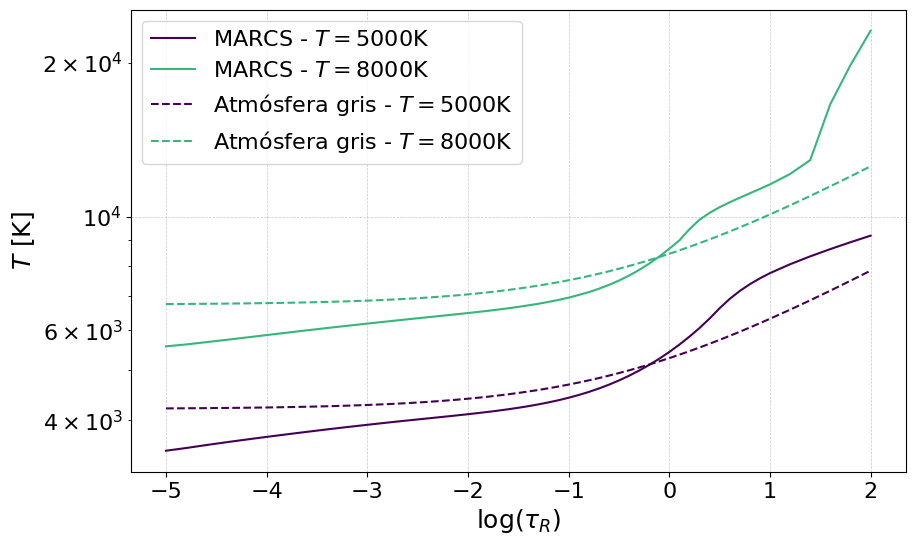

In [16]:
from matplotlib.ticker import ScalarFormatter

# Plot depth vs log tau r
plt.figure(figsize=(10, 6))
plt.plot(data_t5['Depth'], data_t5['lgTauR'], label=r'$T_\mathrm{eff}=5000 $K', color=colors[0])
plt.plot(data_t8['Depth'], data_t8['lgTauR'], label=r'$T_\mathrm{eff}=8000 $K', color=colors[2])
plt.ylabel(r'$\log(\tau_R)$', fontsize=18)
plt.xlabel(r'$\tau$', fontsize=18)
plt.gca().invert_yaxis()

tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.gca().xaxis.get_offset_text().set_fontsize(16)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/depth_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()


############
# Plot T, Pe, Pe/Pg y Prad/Pg vs lgtaur in four different plots

#temperature
plt.figure(figsize=(10, 6))
plt.plot(data_t5['lgTauR'], data_t5['T'], label=r'$T_\mathrm{eff}=5000 $K', color=colors[0])
plt.plot(data_t8['lgTauR'], data_t8['T'], label=r'$T_\mathrm{eff}=8000 $K', color=colors[2])
plt.yscale('log')
plt.ylabel(r'$T$ [K]', fontsize=18)
plt.xlabel(r'$\log(\tau_R)$', fontsize=18)
plt.gca().invert_xaxis()
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/T_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()


#Pe
plt.figure(figsize=(10, 6))
plt.plot(data_t5['lgTauR'], data_t5['Pe'], label=r'$T_\mathrm{eff}=5000 $K', color=colors[0])
plt.plot(data_t8['lgTauR'], data_t8['Pe'], label=r'$T_\mathrm{eff}=8000 $K', color=colors[2])
plt.yscale('log')
plt.ylabel(r'$P_e$ [dyn cm$^{-2}]$', fontsize=18)
plt.xlabel(r'$\log(\tau_R)$', fontsize=18)
plt.gca().invert_xaxis()
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/Pe_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()


#Pe/Pg
plt.figure(figsize=(10, 6))
plt.plot(data_t5['lgTauR'], data_t5['Pe']/data_t5['Pg'], label=r'$T_\mathrm{eff}=5000 $K', color=colors[0])
plt.plot(data_t8['lgTauR'], data_t8['Pe']/data_t8['Pg'], label=r'$T_\mathrm{eff}=8000 $K', color=colors[2])
plt.yscale('log')
plt.ylabel(r'$P_e$ / $P_\mathrm{g}$', fontsize=18)
plt.xlabel(r'$\log(\tau_R)$', fontsize=18)
plt.gca().invert_xaxis()
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/PePg_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()

#Prad/Pg
plt.figure(figsize=(10, 6))
plt.plot(data_t5['lgTauR'], data_t5['Prad']/data_t5['Pg'], label=r'$T_\mathrm{eff}=5000 $K', color=colors[0])
plt.plot(data_t8['lgTauR'], data_t8['Prad']/data_t8['Pg'], label=r'$T_\mathrm{eff}=8000 $K', color=colors[2])
plt.yscale('log')
plt.ylabel(r'$P_{\mathrm{rad}}$ / $P_\mathrm{g}$', fontsize=18)
plt.xlabel(r'$\log(\tau_R)$', fontsize=18)
plt.gca().invert_xaxis()
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/PradPg_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()

############
# Plot T vs a temperature distribution of a gray body

def gray_temperature(T_eff, lgTauR):
    return (3/4 * (T_eff ** 4) * (np.exp(lgTauR) + 2/3))**(1/4)

T_gray_5000 = gray_temperature(5000, data_t5['lgTauR'])
T_gray_8000 = gray_temperature(8000, data_t8['lgTauR'])

plt.figure(figsize=(10, 6))
plt.plot(data_t5['lgTauR'], data_t5['T'], label='MARCS - $T=5000 $K', color=colors[0])
plt.plot(data_t8['lgTauR'], data_t8['T'], label='MARCS - $T=8000 $K', color=colors[2])
plt.plot(data_t5['lgTauR'], T_gray_5000, label='Atmósfera gris - $T=5000 $K', linestyle='--', color=colors[0])
plt.plot(data_t8['lgTauR'], T_gray_8000, label='Atmósfera gris - $T=8000 $K', linestyle='--', color=colors[2])
plt.yscale('log')
plt.ylabel(r'$T$ [K]', fontsize=18)
plt.xlabel(r'$\log(\tau_R)$', fontsize=18)
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("Plots/Tmodelos_vs_tau_r.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()


# Poblaciones

In [17]:
#Constantes y funciones para Saha y Boltzmann

kb_cgs = 1.38e-16 # Constante de Botlzmann en erg/K
kb = 8.617e-5  # Constante de Boltzmann en eV/K
U_Hm = 1 # Funciones de partición
U_HI = 2
U_HII = 1
chi_HmHI = 0.765 # Energía de ionización en eV
chi_HIHII = 13.6

chi_HI = [0,10.206,12.095] # Chi en eV para n=1,2,3
gn_HI = [2,8,18]   # g_n para n=1,2,3

def Saha(T, Pe):    
    Ne = Pe / (kb_cgs * T) # Número de electrones a partir de la presión electrónica del modelo
    N_HmHI = 2.07e-16 * Ne * (U_Hm/U_HI) * T**(-3/2)* np.exp(chi_HmHI/(kb * T))     # Ec de Saha H-/HI (chi está en eV, por lo tanto Kb tamb)
    N_HIHII = 2.07e-16 * Ne * (U_HI/U_HII) * T**(-3/2)* np.exp(chi_HIHII/(kb * T))  # Ec de Saha HI/HII
    # Resolver el sistema de ecuaciones para obtener N_Hm a partir de la conservación de la carga: N_HII = Ne + N_Hm
    N_Hm = (N_HmHI*N_HIHII*Ne)/(1-(N_HmHI*N_HIHII))    
    N_HI = (N_Hm)/(N_HmHI)
    N_HII = (N_HI)/(N_HIHII)
    return N_Hm, N_HI, N_HII, Ne

def Boltzmann(T, N_HI, gn_HI, chi_HI):
    # Ratios entre niveles
    N_n1n2 = (gn_HI[0] / gn_HI[1]) * np.exp((chi_HI[1] - chi_HI[0]) / (kb * T))
    N_n2n3 = (gn_HI[1] / gn_HI[2]) * np.exp((chi_HI[2] - chi_HI[1]) / (kb * T))
    # Calcular valores para cada nivel
    N_n2 = N_HI / (1 + N_n1n2 + (1/N_n2n3))
    N_n1 = N_n2 * N_n1n2
    N_n3 = N_n2 / N_n2n3
    # Suma de las poblaciones
    suma_N_n = N_n1 + N_n2 + N_n3
    return N_n1, N_n2, N_n3, suma_N_n


In [18]:

# Aplicar las funciones de Saha y Boltzmann a los datos
results_t5 = {
    "N_Hm": [], "N_HI": [], "N_HII": [], "Ne": [],
    "N_n1": [], "N_n2": [], "N_n3": [], "suma_N_n": []
}

results_t8 = {
    "N_Hm": [], "N_HI": [], "N_HII": [], "Ne": [],
    "N_n1": [], "N_n2": [], "N_n3": [], "suma_N_n": []
}

# Iterar sobre los valores de T y Pe en t5000.dat
for T, Pe in zip(data_t5["T"], data_t5["Pe"]):
    N_Hm, N_HI, N_HII, Ne = Saha(T, Pe)
    N_n1, N_n2, N_n3, suma_N_n = Boltzmann(T, N_HI, gn_HI, chi_HI)

    results_t5["N_Hm"].append(N_Hm)
    results_t5["N_HI"].append(N_HI)
    results_t5["N_HII"].append(N_HII)
    results_t5["Ne"].append(Ne)
    results_t5["N_n1"].append(N_n1)
    results_t5["N_n2"].append(N_n2)
    results_t5["N_n3"].append(N_n3)
    results_t5["suma_N_n"].append(suma_N_n)

# Iterar sobre los valores de T y Pe en t8000.dat
for T, Pe in zip(data_t8["T"], data_t8["Pe"]):
    N_Hm, N_HI, N_HII, Ne = Saha(T, Pe)
    N_n1, N_n2, N_n3, suma_N_n = Boltzmann(T, N_HI, gn_HI, chi_HI)

    results_t8["N_Hm"].append(N_Hm)
    results_t8["N_HI"].append(N_HI)
    results_t8["N_HII"].append(N_HII)
    results_t8["Ne"].append(Ne)
    results_t8["N_n1"].append(N_n1)
    results_t8["N_n2"].append(N_n2)
    results_t8["N_n3"].append(N_n3)
    results_t8["suma_N_n"].append(suma_N_n)

# Convertir los resultados en arrays 
for key in results_t5:
    results_t5[key] = np.array(results_t5[key])
for key in results_t8:
    results_t8[key] = np.array(results_t8[key])

# Obtener los valores correspondientes a diferentes tauR
def get_tauR_indices(lgTauR_values, tau_values):
    indices = {}
    for tau in tau_values:
        idx = np.abs(np.array(10**lgTauR_values) - tau).argmin()
        indices[tau] = idx
    return indices

# Valores de tau a considerar
tau_values = [0.5, 1, 5]
tau_indices_t5 = get_tauR_indices(data_t5["lgTauR"], tau_values)
tau_indices_t8 = get_tauR_indices(data_t8["lgTauR"], tau_values)

# Imprimir resultados para los valores de tauR 
print("Resultados para t5000.dat en valores específicos de tauR:")
for tau, idx in tau_indices_t5.items():
    print(f"TauR = {tau}: Ne = {results_t5['Ne'][idx]:.4g}, N_Hm = {results_t5['N_Hm'][idx]:.4g}, N_HI = {results_t5['N_HI'][idx]:.4g}, N_HII = {results_t5['N_HII'][idx]:.4g}, N_n1 = {results_t5['N_n1'][idx]:.4g}, N_n2 = {results_t5['N_n2'][idx]:.4g}, N_n3 = {results_t5['N_n3'][idx]:.4g}, suma_N_n = {results_t5['suma_N_n'][idx]:.4g}")

print("\nResultados para t8000.dat en valores específicos de tauR:")
for tau, idx in tau_indices_t8.items():
    print(f"TauR = {tau}: Ne = {results_t8['Ne'][idx]:.4g}, N_Hm = {results_t8['N_Hm'][idx]:.4g}, N_HI = {results_t8['N_HI'][idx]:.4g}, N_HII = {results_t8['N_HII'][idx]:.4g}, N_n1 = {results_t8['N_n1'][idx]:.4g}, N_n2 = {results_t8['N_n2'][idx]:.4g}, N_n3 = {results_t8['N_n3'][idx]:.4g}, suma_N_n = {results_t8['suma_N_n'][idx]:.4g}")

# Crear listas para almacenar los valores correspondientes a tau = 1
tau_1_values_t5 = {key: results_t5[key][tau_indices_t5[1]] for key in results_t5}
tau_1_values_t8 = {key: results_t8[key][tau_indices_t8[1]] for key in results_t8}


Resultados para t5000.dat en valores específicos de tauR:
TauR = 0.5: Ne = 1.092e+13, N_Hm = 1.388e+11, N_HI = 7.343e+18, N_HII = 1.106e+13, N_n1 = 7.343e+18, N_n2 = 1.498e+09, N_n3 = 4.193e+07, suma_N_n = 7.343e+18
TauR = 1: Ne = 1.92e+13, N_Hm = 3.968e+10, N_HI = 1.562e+18, N_HII = 1.924e+13, N_n1 = 1.562e+18, N_n2 = 2.144e+09, N_n3 = 8.546e+07, suma_N_n = 1.562e+18
TauR = 5: Ne = 3.235e+14, N_Hm = 5.246e+10, N_HI = 2.739e+17, N_HII = 3.236e+14, N_n1 = 2.739e+17, N_n2 = 7.057e+10, N_n3 = 7.41e+09, suma_N_n = 2.739e+17

Resultados para t8000.dat en valores específicos de tauR:
TauR = 0.5: Ne = 2.262e+14, N_Hm = 1.642e+09, N_HI = 1.582e+16, N_HII = 2.262e+14, N_n1 = 1.582e+16, N_n2 = 1.819e+10, N_n3 = 2.52e+09, suma_N_n = 1.582e+16
TauR = 1: Ne = 6.044e+14, N_Hm = 3.395e+09, N_HI = 1.566e+16, N_HII = 6.044e+14, N_n1 = 1.566e+16, N_n2 = 7.124e+10, N_n3 = 1.273e+10, suma_N_n = 1.566e+16
TauR = 5: Ne = 3.417e+15, N_Hm = 5.907e+09, N_HI = 8.397e+15, N_HII = 3.417e+15, N_n1 = 8.396e+15, N_n

# Opacidades

### Opacidades libre-libre, ligado-libre y de dispersión de e- para H^- y HI 

In [19]:
# Constantes y funciones para las opacidades
c = 3e18 # Vel de la luz en A/s
h = 4.135667696e-15 # Constante de Planck en eV*s
R = 1.0968e-3    # Cte de Rydberg en A-1

# Libre-Libre H-
def free_free_Hm(T, Pe, l, n_HI):
    theta = 5040 / T
    ltheta = np.log10(theta)
    ll = np.log10(l)
    f0 = -2.2763 - 1.6850*ll + 0.76661*(ll**2) - 0.053346*(ll**3)
    f1 = 15.2827 - 9.2846*ll + 1.99381*(ll**2) - 0.142631*(ll**3)
    f2 = -197.789 + 190.266*ll - 67.9775*(ll**2) + 10.6913*(ll**3) - 0.625151*(ll**4)
    sigma_ff = (10**-26) * 10**(f0 + f1*ltheta + f2*ltheta**2)
    k_ff_Hm = sigma_ff * Pe * n_HI *1e-6
    return k_ff_Hm 

# Ligado-Libre H-
def bound_free_Hm(T, Pe, l, n_Hm):
    l0 = 16220  # Umbral de ionización de H- a HI (en Ångstroms)
    theta = 5040 / T
    a0 = 1.99654
    a1 = -1.18267e-5
    a2 = 2.64243e-6
    a3 = -4.40524e-10
    a4 = 3.23992e-14
    a5 = -1.39568e-18
    a6 = 2.78701e-23
    k_bf_Hm = []
    for lam in l:
        if lam <= l0:  
            sigma_bf = (a0 + a1*lam + a2*lam**2 + a3*lam**3 +
                        a4*lam**4 + a5*lam**5 + a6*lam**6) * 1e-18
            k_bf = sigma_bf * n_Hm * (1 - np.exp((- h * (c / lam)) / (kb * T)))
        else:
            k_bf = 0  
        k_bf_Hm.append(k_bf if np.isscalar(k_bf) else float(k_bf))  
    return np.array(k_bf_Hm)

# Libre-Libre HI
def free_free_HI(T, l, Ne, nk):
    g_ff = 1 + ((0.3456 / (l*R)**(1/3)) * ((l*kb*T/(h*c)) + (1/2))) 
    sigma_ff = 3.7e8 * (g_ff / (T**(1/2)*(c/l)**3))    
    k_ff_HI = sigma_ff * Ne * nk * (1 - np.exp((-h * (c / l)) / (kb*T)))  
    return k_ff_HI

def bound_free_HI(T, l, n, nn):
    k_bf_HI = []
    l0 = (n**2) / R
    for lam in l:
        if lam <= l0:
            g_bf = 1 - (0.3456 / (lam * R)**(1/3)) * ((lam * R / (n**2)) - 0.5)
            sigma_bf = 2.815e29 * (g_bf / ((n**5) * (c / lam)**3))
        else:
            sigma_bf = 0
        k_bf = sigma_bf * nn * (1 - np.exp((-h * (c / lam)) / (kb * T)))
        k_bf_HI.append(k_bf)
    return np.array(k_bf_HI)

# Dispersión de electrones
def electron(Ne, l):
    k_e = Ne * 6.25e-25 * np.ones_like(l)
    return k_e


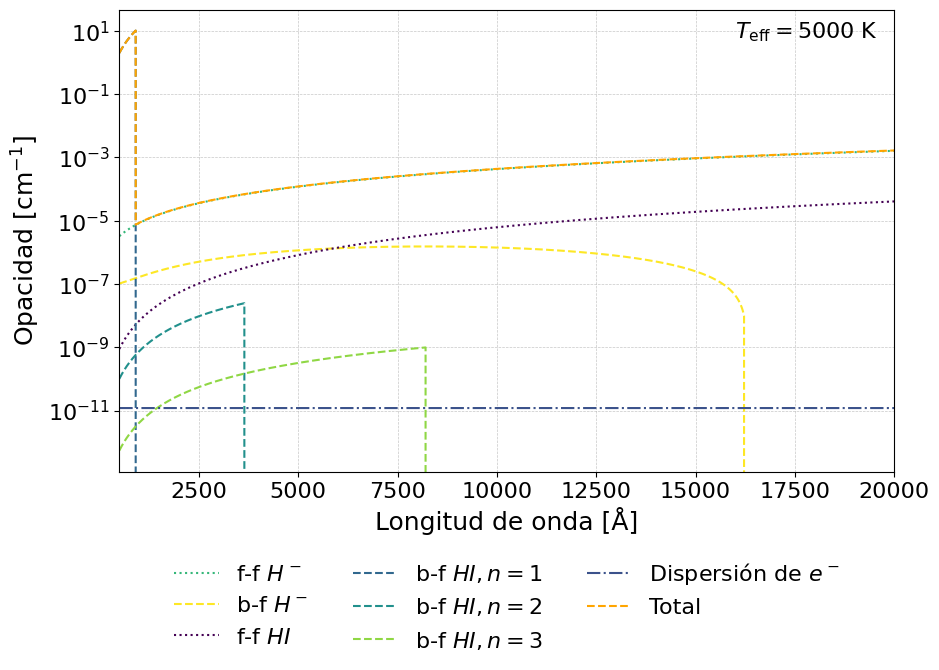

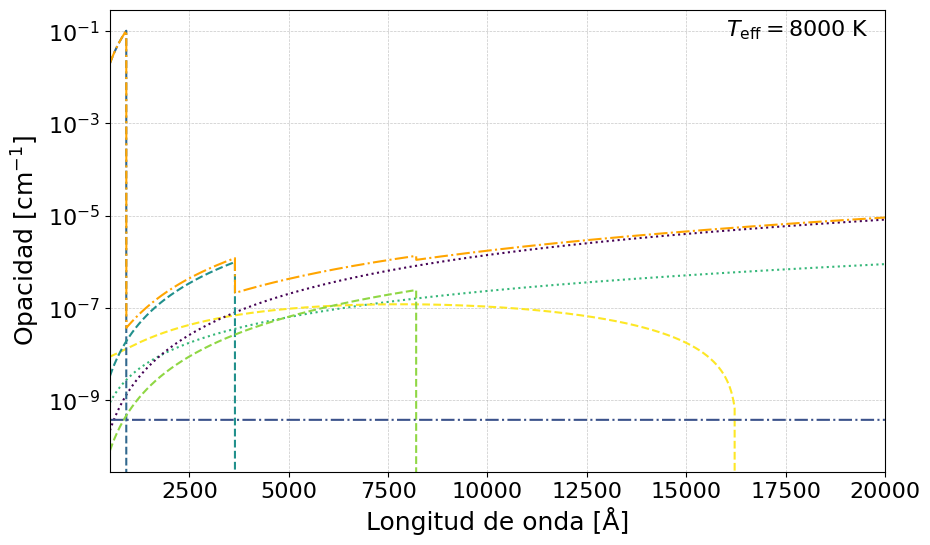

In [20]:
# Graficar las contribuciones de las opacidades

# Serie de longitudes de onda (en A)
l=np.linspace(500, 20000,10000)

delta_lambda = 5
longitudes = [911, 3646, 8205, 16421]
selected_ranges = [(l - delta_lambda, l + delta_lambda) for l in longitudes]

##################################################################

# Resultados para las opacidades a T=5000K
Pe_5000 = tau_1_values_t5["N_Hm"]
Ne_5000 = tau_1_values_t5["Ne"]
n_HI_5000 = tau_1_values_t5["N_HI"]
n_HI_5000_n1 = tau_1_values_t5["N_n1"]
n_HI_5000_n2 = tau_1_values_t5["N_n2"]
n_HI_5000_n3 = tau_1_values_t5["N_n3"]
n_Hm_5000 = tau_1_values_t5["N_Hm"]

k_ff_HI_5000 = free_free_HI(5000, l, Ne_5000, n_HI_5000)

k_bf_HI_5000_n1 = bound_free_HI(T, l, 1, n_HI_5000_n1)
k_bf_HI_5000_n2 = bound_free_HI(T, l, 2, n_HI_5000_n2)
k_bf_HI_5000_n3 = bound_free_HI(T, l, 3, n_HI_5000_n3)

k_ff_Hm_5000 = free_free_Hm(5000, Pe_5000, l, n_HI_5000)
k_bf_Hm_5000 = bound_free_Hm(5000, Pe_5000, l, n_Hm_5000)

k_e_5000 = electron(Ne_5000, l)

# Suma total de opacidades a T=5000K
k_total_5000 = k_ff_HI_5000 + k_bf_HI_5000_n1 + k_bf_HI_5000_n2 + k_bf_HI_5000_n3 + k_ff_Hm_5000 + k_bf_Hm_5000 + k_e_5000

# Graficar las contribuciones de las opacidades para T=5000K
plt.figure(figsize=(10, 6))
plt.plot(l, k_ff_Hm_5000, label=r'f-f $H^-$', linestyle=':', color=colors[2])
plt.plot(l, k_bf_Hm_5000, label=r'b-f $H^-$', linestyle='--', color=colors[3])
plt.plot(l, k_ff_HI_5000, label=r'f-f $HI$', linestyle=':', color=colors[0])
plt.plot(l, k_bf_HI_5000_n1, label=r'b-f $HI, n=1$', linestyle='--', color=colors[1])
plt.plot(l, k_bf_HI_5000_n2, label=r'b-f $HI, n=2$', linestyle='--', color=colors[5])
plt.plot(l, k_bf_HI_5000_n3, label=r'b-f $HI, n=3$', linestyle='--', color=colors[6])
plt.plot(l, k_e_5000, label=r'Dispersión de $e^-$', linestyle='-.', color=colors[4])
plt.plot(l, k_total_5000, label='Total', linestyle='--', color='orange')
plt.text(16000, 6, r'$T_\mathrm{eff}=5000$ K', fontsize=16)
plt.xlim(500,20000)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Longitud de onda [Å]', fontsize=18)
plt.ylabel(r'Opacidad [cm$^{-1}$]', fontsize=18)
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=16, ncol=3, frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('Plots/opacidades_T5000.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

####################################################################

# Resultados para las opacidades a T=8000K
Pe_8000 = tau_1_values_t8["N_Hm"]
Ne_8000 = tau_1_values_t8["Ne"]
n_HI_8000 = tau_1_values_t8["N_HI"]
n_HI_8000_n1 = tau_1_values_t8["N_n1"]
n_HI_8000_n2 = tau_1_values_t8["N_n2"]
n_HI_8000_n3 = tau_1_values_t8["N_n3"]
n_Hm_8000 = tau_1_values_t8["N_Hm"]

k_ff_HI_8000 = free_free_HI(8000, l, Ne_8000, n_HI_8000)

k_bf_HI_8000_n1 = bound_free_HI(8000, l, 1, n_HI_8000_n1)
k_bf_HI_8000_n2 = bound_free_HI(8000, l, 2, n_HI_8000_n2)
k_bf_HI_8000_n3 = bound_free_HI(8000, l, 3, n_HI_8000_n3)

k_ff_Hm_8000 = free_free_Hm(8000, Pe_8000, l, n_HI_8000)
k_bf_Hm_8000 = bound_free_Hm(8000, Pe_8000, l, n_Hm_8000)

k_e_8000 = electron(Ne_8000, l)

# Suma total de opacidades a T=8000K
k_total_8000 = k_ff_HI_8000 + k_bf_HI_8000_n1 + k_bf_HI_8000_n2 + k_bf_HI_8000_n3 + k_ff_Hm_8000 + k_bf_Hm_8000 + k_e_8000

# Graficar las contribuciones de las opacidades para T=8000K
plt.figure(figsize=(10, 6))
plt.plot(l, k_ff_Hm_8000, label=r'f-f $H^-$', linestyle=':', color=colors[2])
plt.plot(l, k_bf_Hm_8000, label=r'b-f $H^-$', linestyle='--', color=colors[3])
plt.plot(l, k_ff_HI_8000, label=r'f-f $HI$', linestyle=':', color=colors[0])
plt.plot(l, k_bf_HI_8000_n1, label=r'b-f $HI, n=1$', linestyle='--', color=colors[1])
plt.plot(l, k_bf_HI_8000_n2, label=r'b-f $HI, n=2$', linestyle='--', color=colors[5])
plt.plot(l, k_bf_HI_8000_n3, label=r'b-f $HI, n=3$', linestyle='--', color=colors[6])
plt.plot(l, k_e_8000, label=r'Dispersión de $e^-$', linestyle='-.', color=colors[4])
plt.plot(l, k_total_8000, label='Total', linestyle='-.', color='orange')
plt.text(16000, .08, r'$T_\mathrm{eff}=8000$ K', fontsize=16)
plt.xlim(500,20000)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Longitud de onda [Å]', fontsize=18)
plt.ylabel(r'Opacidad [cm$^{-1}$]', fontsize=18)
tick_size = 16
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_size)
#plt.legend(loc='upper right', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('Plots/opacidades_T8000.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Imprimir los resultados para las longitudes de onda seleccionadas

# Filtrar las longitudes de onda dentro de los rangos definidos 
for i, (low, high) in enumerate(selected_ranges):
    mask_low = np.abs(l - low) <= 1.0  
    mask_high = np.abs(l - high) <= 1.0

    def get_value(mask, array):
        filtered_values = array[mask]
        valid_values = filtered_values[filtered_values >= 1e-18]
        return valid_values[0] if valid_values.size > 0 else "N/A"
    def format_value(value):
        return f"{value:.4g}" if isinstance(value, (float, np.floating)) else value    
    
    print('Para 5000K')
    print(f"Resultados para la longitud {longitudes[i]} Å:")
    print(f"  k_ff_HI: Low = {format_value(get_value(mask_low, k_ff_HI_5000))}, High = {format_value(get_value(mask_high, k_ff_HI_5000))}")
    print(f"  k_bf_HI_n1: Low = {format_value(get_value(mask_low, k_bf_HI_5000_n1))}, High = {format_value(get_value(mask_high, k_bf_HI_5000_n1))}")
    print(f"  k_bf_HI_n2: Low = {format_value(get_value(mask_low, k_bf_HI_5000_n2))}, High = {format_value(get_value(mask_high, k_bf_HI_5000_n2))}")
    print(f"  k_bf_HI_n3: Low = {format_value(get_value(mask_low, k_bf_HI_5000_n3))}, High = {format_value(get_value(mask_high, k_bf_HI_5000_n3))}")
    print(f"  k_ff_Hm: Low = {format_value(get_value(mask_low, k_ff_Hm_5000))}, High = {format_value(get_value(mask_high, k_ff_Hm_5000))}")
    print(f"  k_bf_Hm: Low = {format_value(get_value(mask_low, k_bf_Hm_5000))}, High = {format_value(get_value(mask_high, k_bf_Hm_5000))}")
    print(f"  k_e: Low = {format_value(get_value(mask_low, k_e_5000))}, High = {format_value(get_value(mask_high, k_e_5000))}")
    print(f"  k_total: Low = {format_value(get_value(mask_low, k_total_5000))}, High = {format_value(get_value(mask_high, k_total_5000))}")
    print('')


    print('Para 8000K')
    print(f"Resultados para la longitud {longitudes[i]} Å:")
    print(f"  k_ff_HI: Low = {format_value(get_value(mask_low, k_ff_HI_8000))}, High = {format_value(get_value(mask_high, k_ff_HI_8000))}")
    print(f"  k_bf_HI_n1: Low = {format_value(get_value(mask_low, k_bf_HI_8000_n1))}, High = {format_value(get_value(mask_high, k_bf_HI_8000_n1))}")
    print(f"  k_bf_HI_n2: Low = {format_value(get_value(mask_low, k_bf_HI_8000_n2))}, High = {format_value(get_value(mask_high, k_bf_HI_8000_n2))}")
    print(f"  k_bf_HI_n3: Low = {format_value(get_value(mask_low, k_bf_HI_8000_n3))}, High = {format_value(get_value(mask_high, k_bf_HI_8000_n3))}")
    print(f"  k_ff_Hm: Low = {format_value(get_value(mask_low, k_ff_Hm_8000))}, High = {format_value(get_value(mask_high, k_ff_Hm_8000))}")
    print(f"  k_bf_Hm: Low = {format_value(get_value(mask_low, k_bf_Hm_8000))}, High = {format_value(get_value(mask_high, k_bf_Hm_8000))}")
    print(f"  k_e: Low = {format_value(get_value(mask_low, k_e_8000))}, High = {format_value(get_value(mask_high, k_e_8000))}")
    print(f"  k_total: Low = {format_value(get_value(mask_low, k_total_8000))}, High = {format_value(get_value(mask_high, k_total_8000))}")
    print("------------------------------------------------------------")


Para 5000K
Resultados para la longitud 911 Å:
  k_ff_HI: Low = 5.112e-09, High = 5.277e-09
  k_bf_HI_n1: Low = 10.02, High = N/A
  k_bf_HI_n2: Low = 5.636e-10, High = 5.813e-10
  k_bf_HI_n3: Low = 3.088e-12, High = 3.186e-12
  k_ff_Hm: Low = 7.287e-06, High = 7.401e-06
  k_bf_Hm: Low = 1.526e-07, High = 1.541e-07
  k_e: Low = 1.2e-11, High = 1.2e-11
  k_total: Low = 10.02, High = 7.561e-06

Para 8000K
Resultados para la longitud 911 Å:
  k_ff_HI: Low = 1.283e-09, High = 1.324e-09
  k_bf_HI_n1: Low = 0.1006, High = N/A
  k_bf_HI_n2: Low = 1.874e-08, High = 1.933e-08
  k_bf_HI_n3: Low = 4.603e-10, High = 4.75e-10
  k_ff_Hm: Low = 2.739e-09, High = 2.794e-09
  k_bf_Hm: Low = 1.306e-08, High = 1.319e-08
  k_e: Low = 3.778e-10, High = 3.778e-10
  k_total: Low = 0.1006, High = 3.749e-08
------------------------------------------------------------
Para 5000K
Resultados para la longitud 3646 Å:
  k_ff_HI: Low = 3.189e-07, High = 3.215e-07
  k_bf_HI_n1: Low = N/A, High = N/A
  k_bf_HI_n2: Low =

### Opacidades ligado-ligado correspondientes a las líneas de absorción para HI 

In [22]:
# Constantes y funciones para opacidades ligado-ligado del HI

m_e = 9.10938e-28  # masa del electrón en gramos
ec = 4.80326e-10   # carga del electrón statC
c_cgs = 3e10        # velocidad de la luz en cm/s

# Función para calcular la opacidad de las líneas de Lyman
def bound_bound_lyman(T, n, n_HI): 
    if n == 0:  # Lyman-alpha
        low = 1
        up = 2
        n_low = n_HI["N_HI"]
        n_up = n_HI["N_n1"]
    elif n == 1:  # Lyman-beta
        low = 1
        up = 3
        n_low = n_HI["N_HI"]
        n_up = n_HI["N_n2"]
    g_low = 2 * (low**2)  # funciones de partición
    g_up = 2 * (up**2)
    g_bb = [0.717, 0.765]  # factores de Gaunt para Lyman

    f = (2**5 / (3**(3/2) * np.pi)) * (g_bb[n] / (low**5 * up**3)) * ((1 / low**2) - (1 / up**2))**(-3)  # oscilador
    sigma_bb = f * (np.pi * ec**2) / (m_e * c_cgs)
    k_bb = sigma_bb * (n_low - n_up * (g_low / g_up))
    return k_bb

# Función para calcular la opacidad de las líneas de Balmer
def bound_bound_balmer(T, n, n_HI):
    if n == 0:  # H-alpha
        low = 2
        up = 3
        n_low = n_HI["N_n1"]
        n_up = n_HI["N_n2"]
    elif n == 1:  # H-beta
        low = 2
        up = 4
        n_low = n_HI["N_n1"]
        n_up = 0  # Suponemos que no hay HI en n=4
    g_low = 2 * (low**2)  # funciones de partición
    g_up = 2 * (up**2)
    g_bb = 0.869 - (3 / up**2)  # factor de Gaunt para Balmer

    f = (2**5 / (3**(3/2) * np.pi)) * (g_bb / (low**5 * up**3)) * ((1 / low**2) - (1 / up**2))**(-3)  # oscilador
    sigma_bb = f * (np.pi * ec**2) / (m_e * c_cgs)
    k_bb = sigma_bb * (n_low - n_up * (g_low / g_up))*1e-6
    return k_bb


In [23]:
# Calcular las opacidades para las líneas de Lyman y Balmer

# Datos de entrada
n_HI_5000 = {
    "N_HI": tau_1_values_t5["N_HI"],
    "N_n1": tau_1_values_t5["N_n1"],
    "N_n2": tau_1_values_t5["N_n2"],
    "N_n3": tau_1_values_t5["N_n3"]
}

n_HI_8000 = {
    "N_HI": tau_1_values_t8["N_HI"],
    "N_n1": tau_1_values_t8["N_n1"],
    "N_n2": tau_1_values_t8["N_n2"],
    "N_n3": tau_1_values_t8["N_n3"]
}

# Cálculo de opacidades para T=5000
k_bb_lyman_alpha_5000 = bound_bound_lyman(5000, 0, n_HI_5000)
k_bb_lyman_beta_5000 = bound_bound_lyman(5000, 1, n_HI_5000)
k_bb_balmer_alpha_5000 = bound_bound_balmer(5000, 0, n_HI_5000)

# Cálculo de opacidades para T=8000
k_bb_lyman_alpha_8000 = bound_bound_lyman(8000, 0, n_HI_8000)
k_bb_lyman_beta_8000 = bound_bound_lyman(8000, 1, n_HI_8000)
k_bb_balmer_alpha_8000 = bound_bound_balmer(8000, 0, n_HI_8000)

# Resultados
print("Opacidad Lyman-alpha (T=5000):", format(k_bb_lyman_alpha_5000, ".4g"))
print("Opacidad Lyman-beta (T=5000):", format(k_bb_lyman_beta_5000, ".4g"))
print("Opacidad H-alpha (T=5000):", format(k_bb_balmer_alpha_5000, ".4g"))

print("Opacidad Lyman-alpha (T=8000):", format(k_bb_lyman_alpha_8000, ".4g"))
print("Opacidad Lyman-beta (T=8000):", format(k_bb_lyman_beta_8000, ".4g"))
print("Opacidad H-alpha (T=8000):", format(k_bb_balmer_alpha_8000, ".4g"))

Opacidad Lyman-alpha (T=5000): 1.294e+16
Opacidad Lyman-beta (T=5000): 3.276e+15
Opacidad H-alpha (T=5000): 1.879e+10
Opacidad Lyman-alpha (T=8000): 1.297e+14
Opacidad Lyman-beta (T=8000): 3.285e+13
Opacidad H-alpha (T=8000): 1.884e+08
